# Boston Marathon Finisher Time  

## Datasets - Boston Marathon Finisher Result from 2017, 2016, 2015

#### General descriptive statistics based on the datasets 
- Finish time vs age distribution (or age group)
- Finish time vs gender
- Finish time vs division 
- Finish time vs country
- Compare Top 10 finishers over the years (male and female, respectively)


#### Distance travelled and Finish Time
Rumor has it that traveling long distance prior to running a marathon will put a toll of your body and your time. Using these datasets, I want to compare the finishing time of regular runners (not division 1 elites) traveling from a country beyond 6 hr travel time,  a country within 6 hr travel time and those who are local  (the new england state). 


#### Year and Finish Time
There has been some debates about whether the average marathon time has become faster or slower in recent years. Faster because of new running gears, training tools, etc. Slower because more average runners are entering marathons, which were once an elite only sports. I want to compare the finish time of runners (in each division, by age and gender groups) from 2015, 2016 and 2017 to see if there's any noticeable trend indicative of either an increase or decrease in finish time.

#### Pace in first half vs second half and Finish Time
The number one rule of thumb for running a successful marathon is to not go out too fast! However, from personal experience, I found that running a fast first half actually helps decrease my overall finish time (because it's painful after mile 20 regardless). I want to compare the finish time of these 4 groups of runners to see if there's any correlation between pacing and finish time.
- Runners who run a negative split in the first half of the race and positive split in the second half of the race 
- Runners who run a positive split in the first half of the race and negative split in the second half
- Runners who run a negative split throughout the race
- Runners who run a positive split throughout the race


#### The difference between finish time of males vs females becomes smaller with increasing age
The hypthesis is that with increasing age, your pace slow down and the difference between genders becomes less noticeable. 
- Finish Times between male and female stratified by age groups. Can calculate statistical significances.
- Do older runners have less variable pace through time.




#### Possible Challenges:
- Missing data
- Consistence between datasets
- Mapping country to flight time / distance
- Calculating split 
- Comparing data from 3 different datasets



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from datetime import datetime as dt
from geopy.distance import vincenty
from geopy import geocoders  
from geopy.geocoders import Nominatim

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor



%matplotlib inline

colorz = ['turquoise', 'darkmagenta','pink','burlywood','teal','palevioletred']

bm_2017 = pd.read_csv("/Users/aleung/Desktop/data_science_ga/final_project/marathon_results_2017.csv")
bm_2016 = pd.read_csv("/Users/aleung/Desktop/data_science_ga/final_project/marathon_results_2016.csv")
bm_2015 = pd.read_csv("/Users/aleung/Desktop/data_science_ga/final_project/marathon_results_2015.csv")

## Function Library

In [2]:
def to_seconds(timestr):
    seconds= 0
    for part in timestr.split(':'):
        seconds= seconds*60 + int(part)
    return seconds

to_seconds('1:16:59')

4619

In [3]:
def convert_to_str(x):
    x = str(x)
    return x

type(convert_to_str('1:15:59'))


str

In [4]:
def elaspe(x,y):
    time_elapse = y - x
    return time_elapse
elaspe(4619,5581)

962

In [5]:
def convert_to_float(x):
    x = float(x)
    return round(x,2)

convert_to_float('4.55')

4.55

In [6]:
def time_diff (x, y):
    result = y - x 
    return result

time_diff(2554, 3394)

840

In [7]:
#def get_latitude(x):
 #   geolocator = Nominatim()
 #   location = geolocator.geocode(x)
 #  return location.latitude

#get_latitude('boston, MA')


In [8]:
#def get_longitude(x):
#    geolocator = Nominatim()
#    location = geolocator.geocode(x)
#    return location.longitude

#get_longitude('boston, MA')

In [9]:
#def get_distance(x):
#    geolocator = Nominatim()
#    location = geolocator.geocode('x')
#    lat = location.latitude
#    lon = location.longitude
#    p1 = (-lat, lon)
#    boston_ma = (42.361145, -71.038887)
#    print (vincenty(p1, boston_ma).miles)
#    print (p1)

#get_distance('cleveland_oh')

In [10]:
def train_linearReg(x):
    feature_cols =[x]
    X_train = train[feature_cols]
    y_train = train['Official Time']
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    list(zip(feature_cols, linReg.coef_, linReg.intercept_))
    
#train_linearReg('Age')

In [11]:
def test_linearReg(x):
    feature_cols =[x]
    X_test = test[feature_cols]
    y_test = train['Official Time']
    linreg = LinearRegression()
    linreg.fit(X_test, y_test)
    list(zip(feature_cols, linReg.coef_, linReg.intercept_))

In [12]:
def knn(i):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred_class = knn.predict(X_test)
        return (metrics.accuracy_score(y_test, y_pred_class))

In [13]:
def train_logisticReg(x):
    feature_cols = [x]
    X_train = train[feature_cols]
    y_train = train['Official Time']
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    list(zip(feature_cols, logreg.coef_, logreg.intercept_))

In [14]:
def test_logisticReg(x):
    feature_cols = [x]
    X_test = train[feature_cols]
    y_test = train['Official Time']
    logreg = LogisticRegression()
    logreg.fit(X_test, y_test)
    list(zip(feature_cols, logreg.coef_, logreg.intercept_))

In [15]:
def logit(x):
    model = sm.Logit(train['WnvPresent'], train[feature_cols])
    result = model.fit()
    return result

## Data Cleaning

In [16]:
bm_2017.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [17]:
bm_2017.dtypes

Unnamed: 0        int64
Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 9       object
5K               object
10K              object
15K              object
20K              object
Half             object
25K              object
30K              object
35K              object
40K              object
Pace             object
Proj Time        object
Official Time    object
Overall           int64
Gender            int64
Division          int64
dtype: object

In [18]:
bm_2017['5K'] = bm_2017['5K'].str.replace('-','0')
bm_2017['10K'] = bm_2017['10K'].str.replace('-','0')
bm_2017['15K'] = bm_2017['15K'].str.replace('-','0')
bm_2017['20K'] = bm_2017['20K'].str.replace('-','0')
bm_2017['Half'] = bm_2017['Half'].str.replace('-','0')
bm_2017['25K'] = bm_2017['25K'].str.replace('-','0')
bm_2017['30K'] = bm_2017['30K'].str.replace('-','0')
bm_2017['35K'] = bm_2017['35K'].str.replace('-','0')
bm_2017['40K'] = bm_2017['40K'].str.replace('-','0')
bm_2017['Pace'] = bm_2017['Pace'].str.replace('-','0')
bm_2017['Official Time'] = bm_2017['Official Time'].str.replace('-','0')


In [19]:
bm_2017['5K'] = bm_2017['5K'].map(lambda x: to_seconds(x))
bm_2017['10K'] = bm_2017['10K'].map(lambda x: to_seconds(x))
bm_2017['15K'] = bm_2017['15K'].map(lambda x: to_seconds(x))
bm_2017['20K'] = bm_2017['20K'].map(lambda x: to_seconds(x))
bm_2017['Half'] = bm_2017['Half'].map(lambda x: to_seconds(x))
bm_2017['25K'] = bm_2017['25K'].map(lambda x: to_seconds(x))
bm_2017['30K'] = bm_2017['30K'].map(lambda x: to_seconds(x))
bm_2017['35K'] = bm_2017['35K'].map(lambda x: to_seconds(x))
bm_2017['40K'] = bm_2017['40K'].map(lambda x: to_seconds(x))
bm_2017['Pace'] = bm_2017['Pace'].map(lambda x: to_seconds(x))
bm_2017['Official Time'] = bm_2017['Official Time'].map(lambda x: to_seconds(x))
bm_2017

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,4619,5581,6499,7373,297,-,7777,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,4619,5581,6499,7394,298,-,7798,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,4620,5581,6511,7418,299,-,7828,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,4620,5581,6538,7475,303,-,7928,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,4619,5581,6521,7500,304,-,7955,5,5,5
5,5,15,"Abdirahman, Abdi",40,M,Phoenix,AZ,USA,NaN,NaN,...,4619,5581,6532,7521,304,-,7965,6,6,1
6,6,63,"Maiyo, Augustus K.",33,M,Colorado Springs,CO,USA,NaN,NaN,...,4620,5581,6546,7541,305,-,7996,7,7,6
7,7,7,"Sefir, Dino",28,M,Addis Ababa,NaN,ETH,NaN,NaN,...,4716,5692,6671,7629,308,-,8066,8,8,7
8,8,18,"Puskedra, Luke",27,M,Eugene,OR,USA,NaN,NaN,...,4646,5645,6653,7637,309,-,8085,9,9,8
9,9,20,"Ward, Jared",28,M,Kaysville,UT,USA,NaN,NaN,...,4637,5629,6644,7674,311,-,8128,10,10,9


In [20]:
bm_2017.drop(['Unnamed: 9', 'Proj Time'], axis=1)

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,...,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,925,...,3875,4619,5581,6499,7373,297,7777,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,924,...,3875,4619,5581,6499,7394,298,7798,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,925,...,3876,4620,5581,6511,7418,299,7828,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,925,...,3885,4620,5581,6538,7475,303,7928,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,925,...,3875,4619,5581,6521,7500,304,7955,5,5,5
5,5,15,"Abdirahman, Abdi",40,M,Phoenix,AZ,USA,NaN,925,...,3875,4619,5581,6532,7521,304,7965,6,6,1
6,6,63,"Maiyo, Augustus K.",33,M,Colorado Springs,CO,USA,NaN,925,...,3876,4620,5581,6546,7541,305,7996,7,7,6
7,7,7,"Sefir, Dino",28,M,Addis Ababa,NaN,ETH,NaN,924,...,3964,4716,5692,6671,7629,308,8066,8,8,7
8,8,18,"Puskedra, Luke",27,M,Eugene,OR,USA,NaN,924,...,3893,4646,5645,6653,7637,309,8085,9,9,8
9,9,20,"Ward, Jared",28,M,Kaysville,UT,USA,NaN,925,...,3893,4637,5629,6644,7674,311,8128,10,10,9


In [21]:
bm_2017.shape


(26410, 25)

In [22]:
bm_2017.dtypes

Unnamed: 0        int64
Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 9       object
5K                int64
10K               int64
15K               int64
20K               int64
Half              int64
25K               int64
30K               int64
35K               int64
40K               int64
Pace              int64
Proj Time        object
Official Time     int64
Overall           int64
Gender            int64
Division          int64
dtype: object

In [23]:
#Train test split or split this dataset into multiple ways. Also could use data from different year as test. 
#Concat datasets from the 3 years.
#Bin runners into different groups based on division.


## EDA

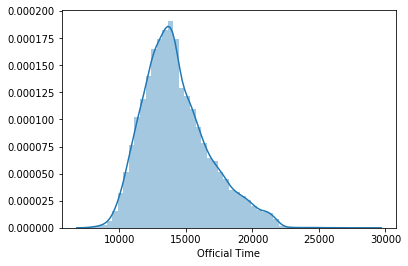

In [24]:
sns.distplot(bm_2017['Official Time'])

In [25]:
bm_2017['Official Time'].median() 
#Prefer this over mean because the number of recreational runners is much higher than the number of serious runners
#this is about 3:51:39

13899.5

In [26]:
bm_2017['Official Time'].describe()

count    26410.000000
mean     14283.555358
std       2528.883183
min       7777.000000
25%      12499.000000
50%      13899.500000
75%      15708.000000
max      28694.000000
Name: Official Time, dtype: float64

### How does the country of origin of the athelete affect finish time? 

In [27]:
country_time = pd.DataFrame(bm_2017.groupby('Country')['Official Time'].mean().reset_index())
country_time_top = pd.DataFrame(country_time.sort_values('Official Time').head(15).round())
country_time_top

,Country,Official Time
90,ZIM,8260.0
47,KEN,8479.0
10,BRN,8571.0
27,ETH,8829.0
6,BDI,9144.0
64,PAN,10982.0
29,FLK,11424.0
45,JAM,11520.0
76,SRB,11601.0
58,MLT,11666.0


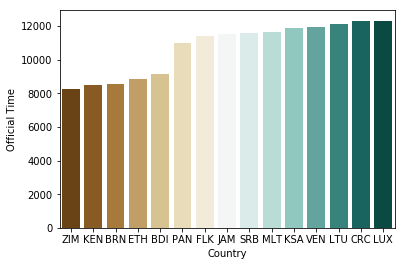

In [28]:
sns.barplot(x='Country', y='Official Time', data = country_time_top, palette = 'BrBG')

### How does gender affect finish time?

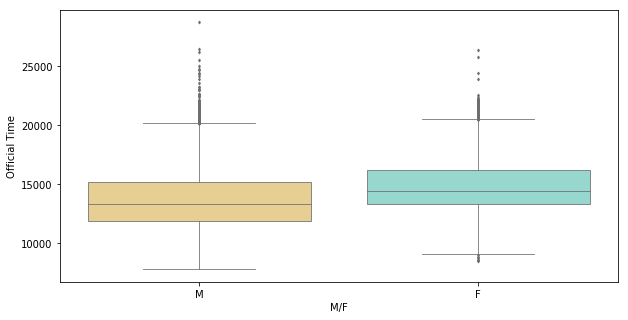

In [29]:
gender_time = sns.boxplot(x="M/F", y="Official Time", data=bm_2017, palette = 'BrBG', saturation =1, linewidth = 0.8, fliersize = 2);
gender_time.figure.set_size_inches(10,5)
plt.show()

### How does age affect finish time?

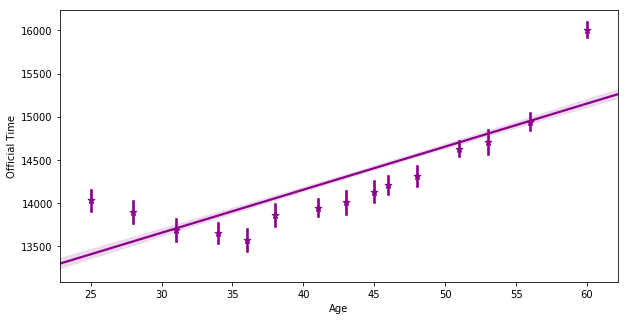

In [30]:
age_time = sns.regplot('Age','Official Time', data = bm_2017, x_bins = 15, marker = "*", color = colorz[1])
age_time.figure.set_size_inches(10,5)

#### Observation -  Finish time decrease with increasing age until around 37. The age with the best finish time is around 37, after that, the finish time increases linearly with increasing age.

### How do age + gender affect finish time?

In [31]:
print(bm_2017.Age.max())
print(bm_2017.Age.min())

84
18


In [32]:
#converting continuous variable - Age to categorical variable - age_group
labels = [ "{0} - {1}".format(i, i + 9) for i in range(15, 85, 10) ]
bm_2017['age_group'] = pd.cut(bm_2017.Age, range(15, 90, 10), right=False, labels=labels)

In [33]:
age_gender_time = pd.DataFrame(bm_2017.groupby(['age_group','M/F'])['Official Time'].mean().round(0))
age_gender_time

Official Time
age_group M/F               
15 - 24   F          15044.0
          M          12940.0
25 - 34   F          14475.0
          M          12866.0
35 - 44   F          14623.0
          M          13065.0
45 - 54   F          15239.0
          M          13831.0
55 - 64   F          16230.0
          M          14881.0
65 - 74   F          17606.0
          M          16529.0
75 - 84   F          19710.0
          M          17483.0

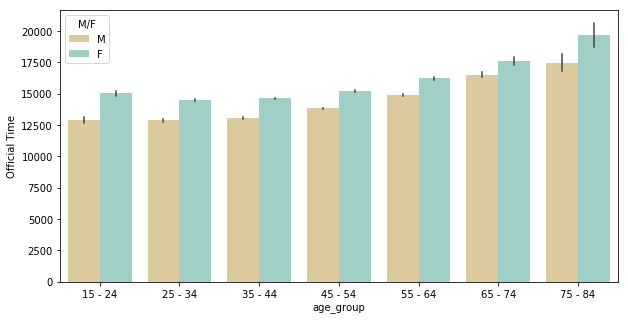

In [34]:
age_gender = sns.barplot(x="age_group", y="Official Time",hue="M/F",data= bm_2017, palette = 'BrBG', errwidth = 1.5);
age_gender.figure.set_size_inches(10,5)

#### Observation - It appears that the time differences between gender group become smaller with increasing age, except for the oldest age group 75-84. However, there are also more variations in terms of finish time in this age group for both M and F.

In [35]:
#sns.regplot('Bib','Official Time', data = bm_2017, marker = "*", color = colorz[1])

### How do division affect finish time?

In [36]:
bm_2017.Division.value_counts()
# seems like the division column in not the actual marathon division of the runners. 

1       20
4       19
6       19
5       19
2       19
9       18
8       18
3       18
7       18
23      17
21      17
10      17
15      17
11      17
17      17
18      17
20      17
12      17
16      17
13      17
14      17
19      17
22      17
25      16
27      16
28      16
26      16
24      16
51      15
97      15
        ..
5487     1
5471     1
5455     1
4785     1
5439     1
4801     1
4817     1
5423     1
5663     1
5679     1
5695     1
5711     1
4917     1
4901     1
4885     1
4869     1
4853     1
4837     1
4821     1
4805     1
4789     1
5839     1
5823     1
5807     1
5791     1
5775     1
5759     1
5743     1
5727     1
5243     1
Name: Division, Length: 5846, dtype: int64

In [37]:
bm_2017.groupby('Official Time')['Official Time'].count().nlargest(20)

Official Time
13465    13
13878    13
14185    13
15217    13
12453    12
12781    12
13082    12
13370    12
13601    12
13785    12
13854    12
15661    12
12182    11
12472    11
12700    11
12899    11
12946    11
12970    11
13018    11
13169    11
Name: Official Time, dtype: int64

## EDA on US runners only   (50 states + PR)

In [38]:
us_runner = bm_2017[bm_2017.Country == 'USA']

In [39]:
us_runner_state = us_runner[us_runner.State.notnull()]

In [40]:
us_runner_state.State.value_counts()
# Will include only the 50 states + DC + PR because of the small number of runners from the unincorporated or military territories.

MA    4586
CA    2049
NY    1324
TX    1055
PA     842
IL     771
OH     693
FL     609
VA     564
CO     534
MI     516
NC     499
NJ     476
WA     465
MN     443
UT     400
MD     396
WI     392
CT     377
NH     324
GA     317
OR     312
AZ     270
IN     267
TN     237
MO     203
ME     186
DC     156
KY     138
SC     136
RI     136
IA     111
ID      93
KS      92
LA      88
NE      85
NV      85
OK      81
VT      80
AL      80
NM      65
AR      56
AK      52
DE      47
WV      41
HI      37
MT      36
SD      34
ND      29
MS      27
WY      21
PR      21
AE       5
VI       2
AP       2
GU       1
AA       1
Name: State, dtype: int64

In [41]:
us_runner_state = us_runner_state.groupby('State').filter(lambda x: len(x) > 5)

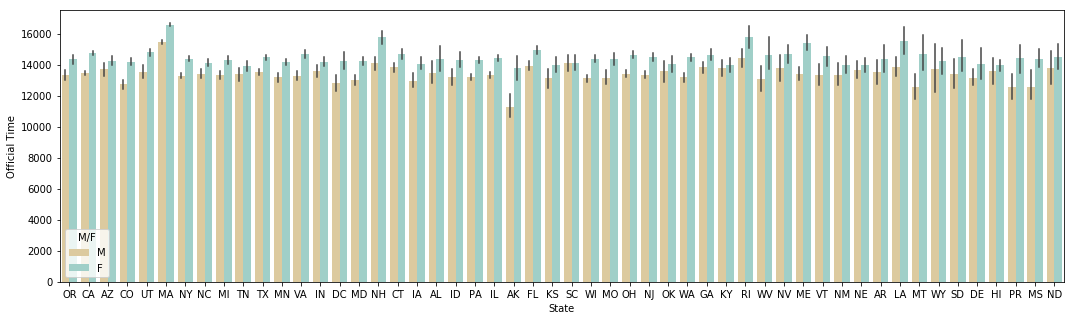

In [42]:
time_by_state = sns.barplot(x="State", y="Official Time",hue="M/F",data= us_runner_state, palette = 'BrBG', errwidth = 1.5);
time_by_state.figure.set_size_inches(18,5)
#Male runners from Alaska are fast! 

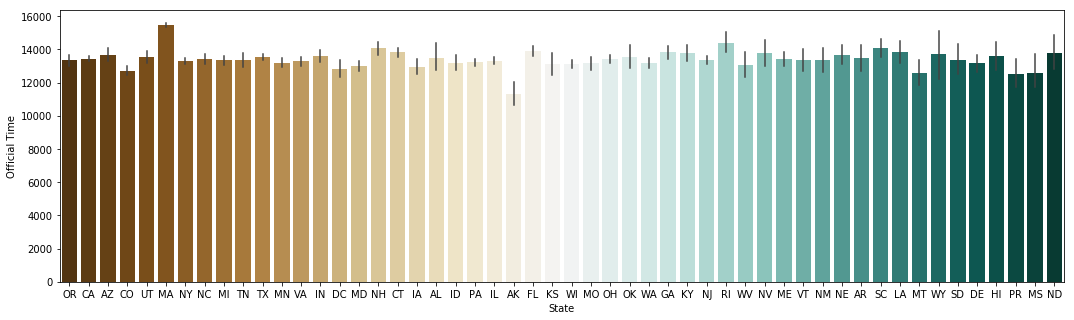

In [43]:

male_by_state = us_runner_state[(us_runner_state['M/F'] == 'M')]
male_by_state = sns.barplot(x="State", y="Official Time", data= male_by_state, palette = 'BrBG', errwidth = 1.5);
male_by_state.figure.set_size_inches(18,5)

### Insight -  If someone travels all the way from Alaska to run the Boston Marathon, he's probably a serious runner who runs fast. Also there might only be a very small amount of runners from AK.

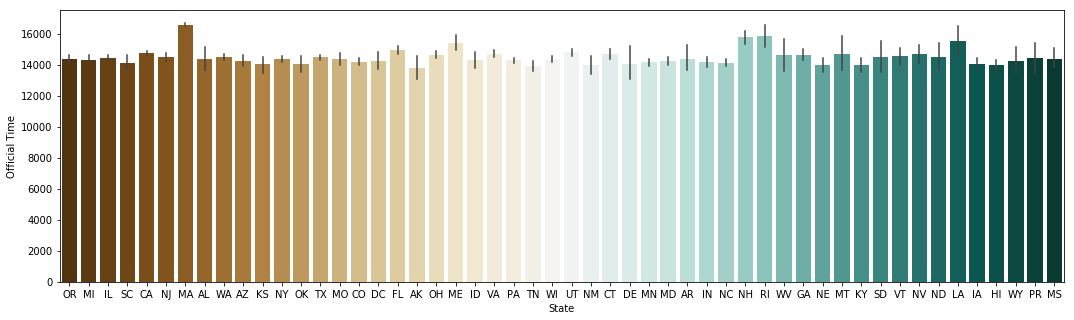

In [44]:
female_by_state = us_runner_state[(us_runner_state['M/F'] == 'F')]
female_by_state = sns.barplot(x="State", y="Official Time", data= female_by_state, palette = 'BrBG', errwidth = 1.5);
female_by_state.figure.set_size_inches(18,5)

## Create derived variable 1 - elite / serious / recreational runners / walker

In [45]:
# The median is 13899.5 and the 25th percentile is 12499. 
# We will use <= 10800 as the cut-off for elite runners 
# We will use <= 12499 as the cut-off for serious runners (top 25)
# We will use <= 18000 as the cut-off for recreational runners 
# We will use > 18000 as the cut off for walker

## Create derived variable 2 - time differences between every 5K marks

In [46]:
bm_2017['5K_10K'] = bm_2017.apply(lambda row: row['10K'] - row['5K'], axis=1)
bm_2017['10K_15K'] = bm_2017.apply(lambda row: row['15K'] - row['10K'], axis=1)
bm_2017['15K_20K'] = bm_2017.apply(lambda row: row['20K'] - row['15K'], axis=1)
bm_2017['20K_25K'] = bm_2017.apply(lambda row: row['25K'] - row['20K'], axis=1)
bm_2017['25K_30K'] = bm_2017.apply(lambda row: row['30K'] - row['25K'], axis=1)
bm_2017['30K_35K'] = bm_2017.apply(lambda row: row['35K'] - row['30K'], axis=1)
bm_2017['35K_40K'] = bm_2017.apply(lambda row: row['40K'] - row['35K'], axis=1)

In [47]:
bm_2017.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,Gender,Division,age_group,5K_10K,10K_15K,15K_20K,20K_25K,25K_30K,30K_35K,35K_40K
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1,1,15 - 24,903,916,931,944,962,918,874
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,2,2,25 - 34,903,917,931,944,962,918,895
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,3,3,25 - 34,904,915,932,944,961,930,907
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,4,4,25 - 34,904,915,935,941,961,957,937
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,5,5,25 - 34,903,916,931,944,962,940,979


## Create a derived variable - distance between participant's city/country and Boston, MA

In [48]:
bm_2017['State'] = bm_2017['State'].fillna(value=' ')


In [49]:
bm_2017['City'].isnull().sum()

0

In [50]:
bm_2017['City_State'] = bm_2017[['City', 'State']].apply(lambda x: ', '.join(x), axis=1)
bm_2017.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,Division,age_group,5K_10K,10K_15K,15K_20K,20K_25K,25K_30K,30K_35K,35K_40K,City_State
0,0,11,"Kirui, Geoffrey",24,M,Keringet,,KEN,NaN,NaN,...,1,15 - 24,903,916,931,944,962,918,874,"Keringet,"
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,2,25 - 34,903,917,931,944,962,918,895,"Portland, OR"
2,2,23,"Osako, Suguru",25,M,Machida-City,,JPN,NaN,NaN,...,3,25 - 34,904,915,932,944,961,930,907,"Machida-City,"
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,4,25 - 34,904,915,935,941,961,957,937,"Mammoth Lakes, CA"
4,4,9,"Chebet, Wilson",31,M,Marakwet,,KEN,NaN,NaN,...,5,25 - 34,903,916,931,944,962,940,979,"Marakwet,"


In [51]:
latitude = pd.DataFrame(bm_2017[(bm_2017['Country'] == 'USA') | (bm_2017['Country'] == 'CAN')])

latitude.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,Division,age_group,5K_10K,10K_15K,15K_20K,20K_25K,25K_30K,30K_35K,35K_40K,City_State
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,2,25 - 34,903,917,931,944,962,918,895,"Portland, OR"
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,4,25 - 34,904,915,935,941,961,957,937,"Mammoth Lakes, CA"
5,5,15,"Abdirahman, Abdi",40,M,Phoenix,AZ,USA,NaN,NaN,...,1,35 - 44,903,916,931,944,962,951,989,"Phoenix, AZ"
6,6,63,"Maiyo, Augustus K.",33,M,Colorado Springs,CO,USA,NaN,NaN,...,6,25 - 34,904,915,931,945,961,965,995,"Colorado Springs, CO"
8,8,18,"Puskedra, Luke",27,M,Eugene,OR,USA,NaN,NaN,...,8,25 - 34,905,918,941,958,999,1008,984,"Eugene, OR"


In [52]:
#latitude['Latitude'] = latitude['City_State'].map(lambda x: get_latitude(x))
#latitude.head()

## Model 1 - Linear Regression

In [53]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7)

In [54]:
#train_linearReg('Age')

In [55]:
#print('train_MAE:', metrics.mean_absolute_error(y_train, linReg.predict(X_train)))
#print('train_MSE:', metrics.mean_squared_error(y_train, linReg.predict(X_train)))
#print('train_RMSE:', np.sqrt(metrics.mean_squared_error(y_train, linReg.predict(X_train))))

In [56]:
#test_linearReg('Age')

In [57]:
#y_pred = linReg.predict(X_test)

#print('test_MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('test_MSE:', metrics.mean_squared_error(y_test, y_pred))
#print('test_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Model 2 - Logistic Regression

In [58]:
#train_logisticReg('M/F')

In [59]:
#test_logisticReg('M/F')

In [60]:
#y_prob=logreg.predict_proba(X_test)

## Model 3 - KNN

In [61]:
#feature_cols =[x]
#knn(3)

## Model 4 - Decision Tree

In [62]:
#Exploring age cutpoint - 
def age_split(age):
    young_runner = bm_2017[bm_2017.Age < age]['Official Time'].mean()
    old_runner = bm_2017[bm_2017.Age >= age]['Official Time'].mean()
    bm_2017['prediction'] = np.where(bm_2017.Age < age, young_runner, old_runner)
    return np.sqrt(metrics.mean_squared_error(bm_2017['Official Time'], bm_2017.prediction))


In [63]:
age_range = list(range(bm_2017.Age.min(), bm_2017.Age.max(), 1))
RMSE = [age_split(age) for age in age_range]

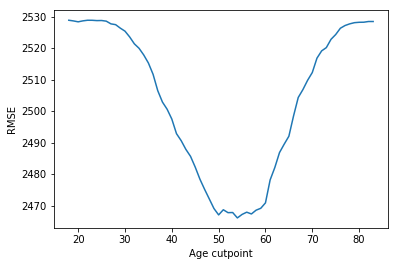

In [64]:
# Plot age cutpoint (x-axis) versus RMSE (y-axis).
plt.plot(age_range, RMSE);
plt.xlabel('Age cutpoint');
plt.ylabel('RMSE');

In [65]:
print('RMSE:', age_split(50))
bm_2017.head() #That's a 41 minutes error. Too large!

RMSE: 2467.02212786


,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,age_group,5K_10K,10K_15K,15K_20K,20K_25K,25K_30K,30K_35K,35K_40K,City_State,prediction
0,0,11,"Kirui, Geoffrey",24,M,Keringet,,KEN,NaN,NaN,...,15 - 24,903,916,931,944,962,918,874,"Keringet,",13932.542748
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,25 - 34,903,917,931,944,962,918,895,"Portland, OR",13932.542748
2,2,23,"Osako, Suguru",25,M,Machida-City,,JPN,NaN,NaN,...,25 - 34,904,915,932,944,961,930,907,"Machida-City,",13932.542748
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,25 - 34,904,915,935,941,961,957,937,"Mammoth Lakes, CA",13932.542748
4,4,9,"Chebet, Wilson",31,M,Marakwet,,KEN,NaN,NaN,...,25 - 34,903,916,931,944,962,940,979,"Marakwet,",13932.542748
